In [ ]:
import pathlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import xarray as xr
from statsmodels.nonparametric.smoothers_lowess import lowess
from matplotlib.gridspec import GridSpec
from numpy.typing import NDArray
from scipy.stats import gamma

path = "/Users/lin/Code/H1_0712/soilmois05_watersat09"
path2 = "/Users/lin/Code/H1_0712/soilmois05_watersat05"
path3 = "/Users/lin/Code/H1_0712/soilresid03_0509"
path4 = "/Users/lin/Code/H1_0712/soilresid03_watersat05"
path5 = "/Users/lin/Code/H1_0712/conduct0001_0509"
path6 = "/Users/lin/Code/H1_0712/soilmoissatura09_0509"

path_1 = "/Users/lin/Code/H1_0712/k=0_5"
path_2 = "/Users/lin/Code/H1_0712/k=50"


In [2]:
high_experiments = ['0821', "1107", "1710", "7784", "9924"]
low_experiments = ["0290", "0397", "0592", "2304", "9482"]
middle_experiments = [
    "1322", "7580", "9620", "8179", "7600",
    "1214", "9578", "8518", "8688", "0193",
    "0916", "8919", "1598", "8306", "9187"
]

for key in high_experiments:
    globals()[f"iH{key}"] = xr.load_dataset(f"{path}/h{key}/initial_state.nc")
    globals()[f"cH{key}"] = xr.load_dataset(f"{path}/h{key}/all_continuous_data.nc")
    globals()[f"fH{key}"] = xr.load_dataset(f"{path}/h{key}/final_state.nc")

for key in low_experiments:
    globals()[f"iL{key}"] = xr.load_dataset(f"{path}/l{key}/initial_state.nc")
    globals()[f"cL{key}"] = xr.load_dataset(f"{path}/l{key}/all_continuous_data.nc")
    globals()[f"fL{key}"] = xr.load_dataset(f"{path}/l{key}/final_state.nc")

for key in middle_experiments:
    globals()[f"iM{key}"] = xr.load_dataset(f"{path}/m{key}/initial_state.nc")
    globals()[f"cM{key}"] = xr.load_dataset(f"{path}/m{key}/all_continuous_data.nc")
    globals()[f"fM{key}"] = xr.load_dataset(f"{path}/m{key}/final_state.nc")

extent = [
    float(iH0821.x.min()),
    float(iH0821.x.max()),
    float(iH0821.y.min()),
    float(iH0821.y.max()),
]

In [42]:
np.shape(cH0821['precipitation_surface'])

(24, 81)

In [3]:
vars_ilowp = set(iL0290.data_vars)
vars_flowp = set(fL0290.data_vars)
only_in_flowp = vars_flowp - vars_ilowp
only_in_flowp

{'air_temperature',
 'animal_arbuscular_mycorrhiza_consumption',
 'animal_bacteria_consumption',
 'animal_ectomycorrhiza_consumption',
 'animal_pom_consumption_carbon',
 'animal_pom_consumption_nitrogen',
 'animal_pom_consumption_phosphorus',
 'animal_saprotrophic_fungi_consumption',
 'atmospheric_co2',
 'atmospheric_pressure',
 'baseflow',
 'bypass_flow',
 'canopy_evaporation',
 'canopy_n_propagules',
 'canopy_non_propagule_c_mass',
 'deadwood_c_n_ratio',
 'deadwood_c_p_ratio',
 'deadwood_production',
 'decomposed_carcasses_carbon',
 'decomposed_carcasses_nitrogen',
 'decomposed_carcasses_phosphorus',
 'decomposed_excrement_carbon',
 'decomposed_excrement_nitrogen',
 'decomposed_excrement_phosphorus',
 'fallen_n_propagules',
 'fallen_non_propagule_c_mass',
 'herbivory_waste_leaf_carbon',
 'herbivory_waste_leaf_lignin',
 'herbivory_waste_leaf_nitrogen',
 'herbivory_waste_leaf_phosphorus',
 'leaf_lignin',
 'leaf_turnover',
 'leaf_turnover_c_n_ratio',
 'leaf_turnover_c_p_ratio',
 'litter

In [ ]:
high_con_vars = [
    'cH0821', 'cH1107', 'cH1710', 'cH7784', 'cH9924'
]
low_con_vars = [
    'cL0290', 'cL0397', 'cL0592', 'cL2304', 'cL9482'
]
high_and_low = high_con_vars + low_con_vars
mid_con_vars = [
    'cM1322', 'cM7580', 'cM9620', 'cM8179', 'cM7600',
    'cM1214', 'cM9578', 'cM8518', 'cM8688', 'cM0193',
    'cM0916', 'cM8919', 'cM1598', 'cM8306', 'cM9187'
]

high_con_monthly_precip_mean = np.zeros((5,24))
high_con_monthly_surrunoff_mean = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars[i]]
    high_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_precip_mean = np.zeros((5,24))
low_con_monthly_surrunoff_mean = np.zeros((5,24))
low_con_monthly_soilmoist_mean = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars[i]]
    low_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

mid_con_monthly_precip_mean = np.zeros((15,24))
mid_con_monthly_surrunoff_mean = np.zeros((15,24))
mid_con_monthly_soilmoist_mean = np.zeros((15,24,14))
for i in range(15):
    ds = globals()[mid_con_vars[i]]
    mid_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    mid_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
    mid_con_monthly_soilmoist_mean[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

con_monthly_precip_mean = np.vstack([high_con_monthly_precip_mean, mid_con_monthly_precip_mean, low_con_monthly_precip_mean])
con_monthly_surrunoff_mean = np.vstack([high_con_monthly_surrunoff_mean, mid_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean])
con_monthly_soilmoist_mean = np.vstack([high_con_monthly_soilmoist_mean, mid_con_monthly_soilmoist_mean, low_con_monthly_soilmoist_mean])

In [75]:
iL0290

<xarray.Dataset> Size: 283kB
Dimensions:                            (cell_id: 81, time_index: 24,
                                        cohort_index: 162, layers: 14,
                                        community_id: 81,
                                        functional_group_id: 11, dim_0: 81,
                                        groundwater_layers: 2)
Coordinates:
    x                                  (cell_id) int64 648B 0 90 180 ... 630 720
    y                                  (cell_id) int64 648B 720 720 720 ... 0 0
  * time_index                         (time_index) int64 192B 0 1 2 ... 22 23
    number                             int64 8B 0
    expver                             (time_index) <U4 384B '0001' ... '0001'
  * cohort_index                       (cohort_index) int64 1kB 0 1 ... 160 161
  * cell_id                            (cell_id) int64 648B 0 1 2 3 ... 78 79 80
  * layers                             (layers) int64 112B 0 1 2 3 ... 11 12 13
    layer_roles                        (layers) <U7 392B 'above' ... 'subsoil'
  * community_id                       (community_id) int64 648B 0 1 2 ... 79 80
  * functional_group_id                (functional_group_id) <U18 792B 'carni...
Dimensions without coordinates: dim_0, groundwater_layers
Data variables: (12/89)
    precipitation                      (time_index, cell_id) float32 8kB 148....
    air_temperature_ref                (time_index, cell_id) float32 8kB 23.9...
    relative_humidity_ref              (time_index, cell_id) float32 8kB 88.4...
    atmospheric_pressure_ref           (time_index, cell_id) float32 8kB 96.5...
    atmospheric_co2_ref                (time_index, cell_id) float32 8kB 400....
    mean_annual_temperature            (cell_id) float32 324B 23.94 ... 23.94
    ...                                 ...
    aerodynamic_resistance_surface     (layers, cell_id) float64 9kB nan ... nan
    aerodynamic_resistance_canopy      (layers, cell_id) float64 9kB nan ... nan
    stomatal_conductance               (layers, cell_id) float64 9kB nan ... nan
    density_air                        (layers, cell_id) float64 9kB 1.133 .....
    specific_heat_air                  (layers, cell_id) float64 9kB 1.02e+03...
    latent_heat_vapourisation          (layers, cell_id) float64 9kB 2.445e+0...

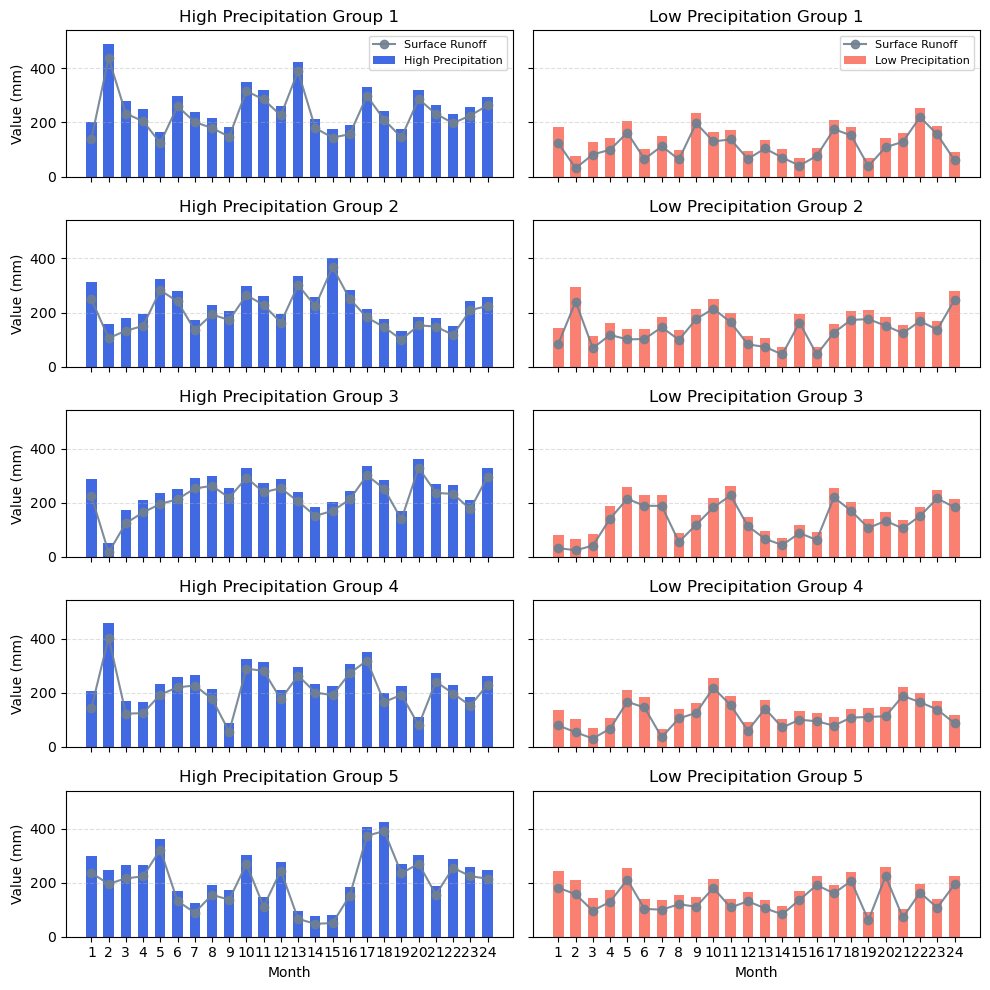

In [5]:
fig, axes = plt.subplots(5, 2, figsize=(10, 10), sharex=True, sharey=True)
axes = axes.flatten()

x = np.arange(1, 25)

# 统一 y 轴上限：precip 和 runoff 的最大值对齐
max_precip = np.max(con_monthly_precip_mean)
max_runoff = np.max(con_monthly_surrunoff_mean)
ymax = max(max_precip, max_runoff) * 1.1

for i in range(5):
    # High precipitation subplot (left column)
    ax = axes[i * 2]
    precip = high_con_monthly_precip_mean[i, :]
    runoff = high_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='royalblue', width=0.6, label='High Precipitation')
    ax.plot(x, runoff, color='slategray', marker='o', label='Surface Runoff', alpha=0.9)

    if i == 0:
        ax.legend(loc='upper right', fontsize=8)
    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(np.arange(1, 25))

    ax.set_title(f'High Precipitation Group {i+1}', fontsize=12)
    ax.set_ylabel('Value (mm)', fontsize=10)
    ax.set_ylim(0, ymax)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

for i in range(5):
    # Low precipitation subplot (right column)
    ax = axes[i * 2 + 1]
    precip = low_con_monthly_precip_mean[i, :]
    runoff = low_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='salmon', width=0.6, label='Low Precipitation')
    ax.plot(x, runoff, color='slategray', marker='o', label='Surface Runoff', alpha=0.9)

    if i == 0:
        ax.legend(loc='upper right', fontsize=8)
    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(np.arange(1, 25))

    ax.set_title(f'Low Precipitation Group {i+1}', fontsize=12)
    ax.set_ylim(0, ymax)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
# plt.show()

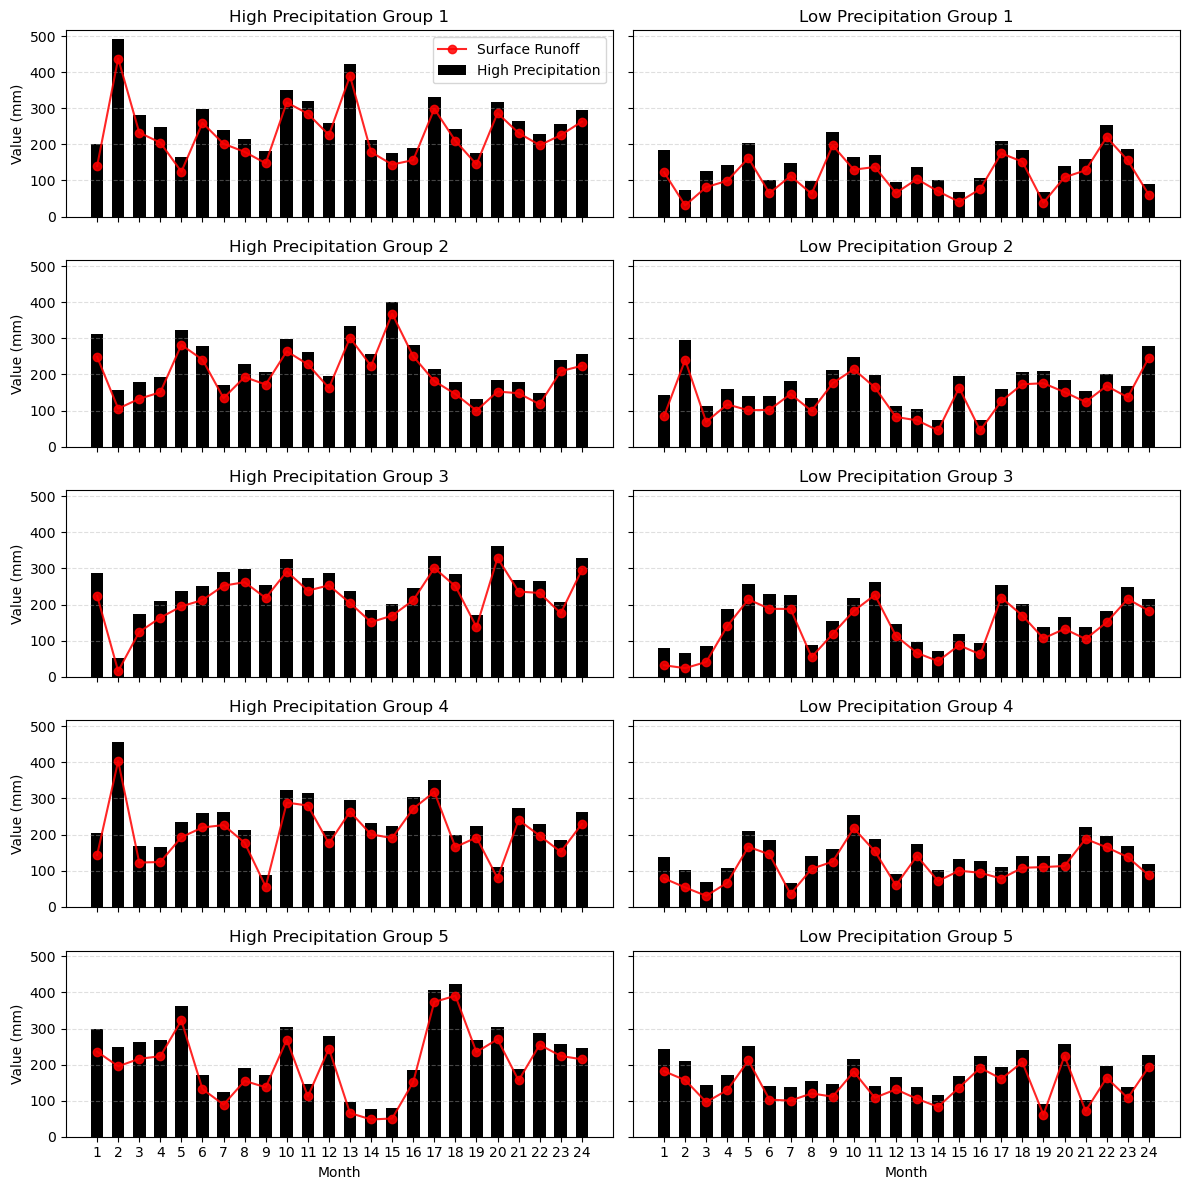

In [7]:
fig, axes = plt.subplots(5, 2, figsize=(12, 12), sharex=True, sharey=True)
axes = axes.flatten()

x = np.arange(1, 25)
max_precip = np.max(con_monthly_precip_mean)
max_runoff = np.max(con_monthly_surrunoff_mean)

for i in range(5):
    ax = axes[i * 2]
    precip = high_con_monthly_precip_mean[i, :]
    runoff = high_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='High Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)

    if i == 0:
        ax.legend(loc='upper right')
    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(np.arange(1, 25))

    ax.set_title(f'High Precipitation Group {i+1}', fontsize=12)
    ax.set_ylabel('Value (mm)', fontsize=10)
    ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

for i in range(5):
    ax = axes[i * 2 + 1]
    precip = low_con_monthly_precip_mean[i, :]
    runoff = low_con_monthly_surrunoff_mean[i, :]

    ax.bar(x, precip, color='k', width=0.6, label='Low Precipitation')
    ax.plot(x, runoff, color='r', marker='o', label='Surface Runoff', alpha=0.85)

    if i == 4:
        ax.set_xlabel('Month', fontsize=10)
        ax.set_xticks(np.arange(1, 25))
        
    ax.set_title(f'Low Precipitation Group {i+1}', fontsize=12)
    ax.set_ylim(0, max_precip * 1.05)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

/var/folders/f4/zsmx3qz54tb44jplrqt8yrr40000gn/T/ipykernel_33127/2190883147.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([runoff_ratio_hl[i] for i in range(10)], labels=group_labels_hl)


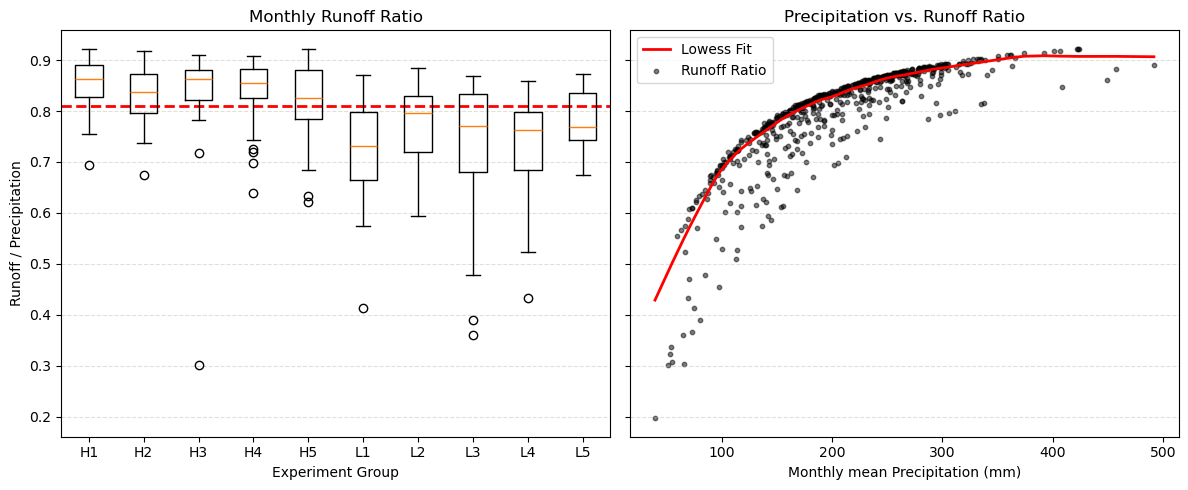

In [8]:
with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio_hl = np.vstack([high_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean]) / np.vstack([high_con_monthly_precip_mean, low_con_monthly_precip_mean])   
    runoff_ratio_hl = np.nan_to_num(runoff_ratio_hl, nan=0.0, posinf=0.0, neginf=0.0)
with np.errstate(divide='ignore', invalid='ignore'):
    runoff_ratio = con_monthly_surrunoff_mean / con_monthly_precip_mean
    runoff_ratio = np.nan_to_num(runoff_ratio, nan=0.0, posinf=0.0, neginf=0.0)
precip_flat = con_monthly_precip_mean.flatten()
runoff_ratio_flat = runoff_ratio.flatten()

group_labels_hl = [f'H{i+1}' for i in range(5)] + [f'L{i+1}' for i in range(5)]

fig, (ax,ax1) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax.axhline(y=0.81, linestyle='--', color='r', linewidth=2)
ax.boxplot([runoff_ratio_hl[i] for i in range(10)], labels=group_labels_hl)
ax.set_xlabel('Experiment Group')
ax.set_ylabel('Runoff / Precipitation')
ax.set_title('Monthly Runoff Ratio')
ax.grid(axis='y', linestyle='--', alpha=0.4)

lowess_fit = lowess(runoff_ratio_flat, precip_flat, frac=0.15)
ax1.plot(lowess_fit[:, 0], lowess_fit[:, 1], color='red', linewidth=2, label='Lowess Fit')
ax1.scatter(precip_flat, runoff_ratio_flat, alpha=0.5, s=10, color='black', label='Runoff Ratio')
ax1.set_xlabel("Monthly mean Precipitation (mm)")
ax1.set_title("Precipitation vs. Runoff Ratio")
ax1.grid(axis='y', linestyle='--', alpha=0.4)
ax1.legend()

fig.tight_layout()
plt.show()

In [9]:
for key in high_experiments:
    globals()[f"c2H{key}"] = xr.load_dataset(f"{path2}/h{key}/all_continuous_data.nc")
for key in low_experiments:
    globals()[f"c2L{key}"] = xr.load_dataset(f"{path2}/l{key}/all_continuous_data.nc")
high_con_vars2 = [
    'c2H0821', 'c2H1107', 'c2H1710', 'c2H7784', 'c2H9924'
]
low_con_vars2 = [
    'c2L0290', 'c2L0397', 'c2L0592', 'c2L2304', 'c2L9482'
]

high_con_monthly_precip_mean2 = np.zeros((5,24))
high_con_monthly_surrunoff_mean2 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean2 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars2[i]]
    high_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean2[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
high_precip_compare = np.vstack([high_con_monthly_precip_mean, high_con_monthly_precip_mean2])
high_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean, high_con_monthly_surrunoff_mean2])

low_con_monthly_precip_mean2 = np.zeros((5,24))
low_con_monthly_surrunoff_mean2 = np.zeros((5,24))
low_con_monthly_soilmoist_mean2 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars2[i]]
    low_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean2[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_precip_compare = np.vstack([low_con_monthly_precip_mean, low_con_monthly_precip_mean2])
low_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean2])

con_monthly_precip_mean0 = np.vstack([high_con_monthly_precip_mean, low_con_monthly_precip_mean])
con_monthly_surrunoff_mean0 = np.vstack([high_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean])
con_monthly_precip_mean2 = np.vstack([high_con_monthly_precip_mean2, low_con_monthly_precip_mean2])
con_monthly_surrunoff_mean2 = np.vstack([high_con_monthly_surrunoff_mean2, low_con_monthly_surrunoff_mean2])
con_monthly_soilmoist_mean2 = np.vstack([high_con_monthly_soilmoist_mean2, low_con_monthly_soilmoist_mean2])

precip_diff2 = con_monthly_precip_mean2 - con_monthly_precip_mean0
precip_diff_mean2 = np.mean(precip_diff2, axis=0)
runoff_diff2 = con_monthly_surrunoff_mean2 - con_monthly_surrunoff_mean0
high_runoff_diff2 = high_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean
low_runoff_diff2 = low_con_monthly_surrunoff_mean2 - low_con_monthly_surrunoff_mean
runoff_diff_mean2 = np.mean(runoff_diff2, axis=0)
high_runoff_diff_mean2 = np.mean(high_runoff_diff2, axis=0)
low_runoff_diff_mean2 = np.mean(low_runoff_diff2, axis=0)

In [26]:
# fig, ax1 = plt.subplots(figsize=(10, 4))
# x = np.arange(1, 25)

# ax1.bar(x, runoff_diff_mean2, color='salmon', label='Δ Runoff')
# ax1.set_ylabel('Δ Surface Runoff (mm)', color='salmon')
# ax1.tick_params(axis='y', labelcolor='salmon')
# ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
# ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# ax2 = ax1.twinx()
# ax2.bar(x, precip_diff_mean2, color='gray', alpha=0.5, width=0.5, label='Δ Precipitation',
#         zorder=0, bottom=0)
# ax2.set_ylabel('Δ Precipitation (mm)', color='gray')
# ax2.tick_params(axis='y', labelcolor='gray')

# ax1.set_xlabel('Month')
# ax1.set_title('Monthly Mean Change in Runoff and Precipitation (Experiment - Control)')
# ymax = max(
#     abs(runoff_diff_mean2).max(),
#     abs(precip_diff_mean2).max()
# )
# ax1.set_ylim(-ymax, ymax)
# ax2.set_ylim(-ymax, ymax)
# plt.tight_layout()
# plt.show()

In [ ]:
for key in high_experiments:
    globals()[f"c3H{key}"] = xr.load_dataset(f"{path3}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c3L{key}"] = xr.load_dataset(f"{path3}/l{key}/all_continuous_data.nc")

high_con_vars3 = [
    'c3H0821', 'c3H1107', 'c3H1710', 'c3H7784', 'c3H9924'
]
low_con_vars3 = [
    'c3L0290', 'c3L0397', 'c3L0592', 'c3L2304', 'c3L9482'
]

high_con_monthly_precip_mean3 = np.zeros((5,24))
high_con_monthly_surrunoff_mean3 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean3 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars3[i]]
    high_con_monthly_precip_mean3[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean3[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean3[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_precip_mean3 = np.zeros((5,24))
low_con_monthly_surrunoff_mean3 = np.zeros((5,24))
low_con_monthly_soilmoist_mean3 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars3[i]]
    low_con_monthly_precip_mean3[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean3[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean3[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_precip_compare3 = np.vstack([low_con_monthly_precip_mean, low_con_monthly_precip_mean3])
low_surrunoff_compare3 = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean3])

con_monthly_precip_mean3 = np.vstack([high_con_monthly_precip_mean3, low_con_monthly_precip_mean3])
con_monthly_surrunoff_mean3 = np.vstack([high_con_monthly_surrunoff_mean3, low_con_monthly_surrunoff_mean3])
con_monthly_soilmoist_mean3 = np.vstack([high_con_monthly_soilmoist_mean3, low_con_monthly_soilmoist_mean3])

precip_diff3 = con_monthly_precip_mean3 - con_monthly_precip_mean0
precip_diff_mean3 = np.mean(precip_diff3, axis=0)
runoff_diff3 = con_monthly_surrunoff_mean3 - con_monthly_surrunoff_mean0
runoff_diff_mean3 = np.mean(runoff_diff3, axis=0)
high_runoff_diff3 = high_con_monthly_surrunoff_mean3 - high_con_monthly_surrunoff_mean
high_runoff_diff_mean3 = np.mean(high_runoff_diff3, axis=0)
low_runoff_diff3 = low_con_monthly_surrunoff_mean3 - low_con_monthly_surrunoff_mean
low_runoff_diff_mean3 = np.mean(low_runoff_diff3, axis=0)

In [27]:
# fig, ax1 = plt.subplots(figsize=(10, 4))
# x = np.arange(1, 25)

# ax1.bar(x, runoff_diff_mean3, color='salmon', label='Δ Runoff')
# ax1.set_ylabel('Δ Surface Runoff (mm)', color='salmon')
# ax1.tick_params(axis='y', labelcolor='salmon')
# ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
# ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# ax2 = ax1.twinx()
# ax2.bar(x, precip_diff_mean3, color='gray', alpha=0.5, width=0.5, label='Δ Precipitation',
#         zorder=0, bottom=0)
# ax2.set_ylabel('Δ Precipitation (mm)', color='gray')
# ax2.tick_params(axis='y', labelcolor='gray')

# ax1.set_xlabel('Month')
# ax1.set_title('Monthly Mean Change in Runoff and Precipitation (Experiment - Control)')
# ymax = max(
#     abs(runoff_diff_mean3).max(),
#     abs(precip_diff_mean3).max()
# )
# ax1.set_ylim(-ymax, ymax)
# ax2.set_ylim(-ymax, ymax)
# plt.tight_layout()
# plt.show()

In [13]:
for key in high_experiments:
    globals()[f"c5H{key}"] = xr.load_dataset(f"{path5}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c5L{key}"] = xr.load_dataset(f"{path5}/l{key}/all_continuous_data.nc")

high_con_vars5 = [
    'c5H0821', 'c5H1107', 'c5H1710', 'c5H7784', 'c5H9924'
]
low_con_vars5 = [
    'c5L0290', 'c5L0397', 'c5L0592', 'c5L2304', 'c5L9482'
]

high_con_monthly_precip_mean5 = np.zeros((5,24))
high_con_monthly_surrunoff_mean5 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean5 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars5[i]]
    high_con_monthly_precip_mean5[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean5[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean5[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_precip_mean5 = np.zeros((5,24))
low_con_monthly_surrunoff_mean5 = np.zeros((5,24))
low_con_monthly_soilmoist_mean5 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars5[i]]
    low_con_monthly_precip_mean5[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean5[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean5[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_precip_compare5 = np.vstack([low_con_monthly_precip_mean, low_con_monthly_precip_mean5])
low_surrunoff_compare5 = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean5])

con_monthly_precip_mean5 = np.vstack([high_con_monthly_precip_mean5, low_con_monthly_precip_mean5])
con_monthly_surrunoff_mean5 = np.vstack([high_con_monthly_surrunoff_mean5, low_con_monthly_surrunoff_mean5])
con_monthly_soilmoist_mean5 = np.vstack([high_con_monthly_soilmoist_mean5, low_con_monthly_soilmoist_mean5])

precip_diff5 = con_monthly_precip_mean5 - con_monthly_precip_mean0
precip_diff_mean5 = np.mean(precip_diff5, axis=0)
runoff_diff5 = con_monthly_surrunoff_mean5 - con_monthly_surrunoff_mean0
runoff_diff_mean5 = np.mean(runoff_diff5, axis=0)
high_runoff_diff5 = high_con_monthly_surrunoff_mean5 - high_con_monthly_surrunoff_mean
high_runoff_diff_mean5 = np.mean(high_runoff_diff5, axis=0)
low_runoff_diff5 = low_con_monthly_surrunoff_mean5 - low_con_monthly_surrunoff_mean
low_runoff_diff_mean5 = np.mean(low_runoff_diff5, axis=0)

In [28]:
# fig, ax1 = plt.subplots(figsize=(10, 4))
# x = np.arange(1, 25)

# ax1.bar(x, runoff_diff_mean5, color='salmon', label='Δ Runoff')
# ax1.set_ylabel('Δ Surface Runoff (mm)', color='salmon')
# ax1.tick_params(axis='y', labelcolor='salmon')
# ax1.axhline(0, color='gray', linestyle='--', linewidth=0.8)
# ax1.grid(True, axis='y', linestyle='--', alpha=0.3)

# ax2 = ax1.twinx()
# ax2.bar(x, precip_diff_mean5, color='gray', alpha=0.5, width=0.5, label='Δ Precipitation',
#         zorder=0, bottom=0)
# ax2.set_ylabel('Δ Precipitation (mm)', color='gray')
# ax2.tick_params(axis='y', labelcolor='gray')

# ax1.set_xlabel('Month')
# ax1.set_title('Monthly Mean Change in Runoff and Precipitation (Experiment - Control)')
# ymax = max(
#     abs(runoff_diff_mean5).max(),
#     abs(precip_diff_mean5).max()
# )
# ax1.set_ylim(-ymax, ymax)
# ax2.set_ylim(-ymax, ymax)
# plt.tight_layout()
# plt.show()

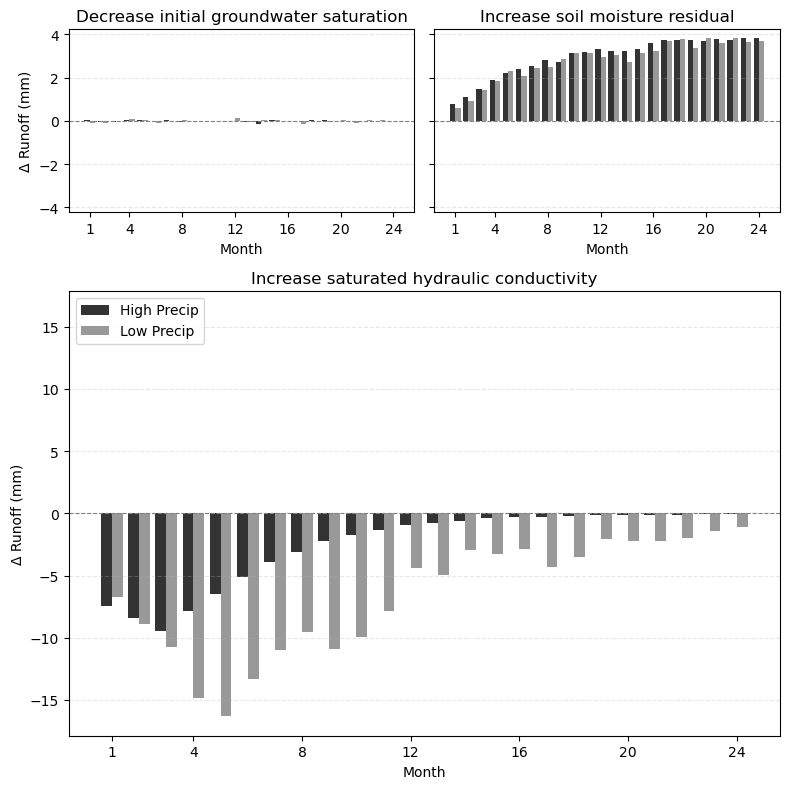

In [ ]:
x = np.arange(1, 25)
bar_width = 0.4

high_y_list = [high_runoff_diff_mean2,
               high_runoff_diff_mean3,
               high_runoff_diff_mean5]
low_y_list  = [low_runoff_diff_mean2,
               low_runoff_diff_mean3,
               low_runoff_diff_mean5]
titles = ['Decrease initial groundwater saturation', 'Increase soil moisture residual', 'Increase saturated hydraulic conductivity']

fig = plt.figure(figsize=(8, 8))
gs  = GridSpec(3, 2, figure=fig)

def plot_pair(ax, high_y, low_y, title):
    x_high, x_low = x - bar_width/2, x + bar_width/2
    ax.bar(x_high, high_y, width=bar_width,
           color='k', alpha=0.8, label='High Precip')
    ax.bar(x_low,  low_y,  width=bar_width,
           color='grey',    alpha=0.8, label='Low Precip')
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Δ Runoff (mm)')
    xticks = [1] + list(np.arange(4, 24, 4)) + [24]
    ax.set_xticks(xticks)        
    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.grid(True, axis='y', ls='--', alpha=0.3)

    ymax = max(abs(high_y).max(), abs(low_y).max()) * 1.10
    ax.set_ylim(-ymax, ymax)

ax1 = fig.add_subplot(gs[0, 0])
plot_pair(ax1, high_y_list[0], low_y_list[0], titles[0])

ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
plot_pair(ax2, high_y_list[1], low_y_list[1], titles[1])
ax2.set_ylabel('')
ax2.tick_params(labelleft=False)            

ax3 = fig.add_subplot(gs[1:, :])            
plot_pair(ax3, high_y_list[2], low_y_list[2], titles[2])
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
high_con_monthly_soilmoist_mean3

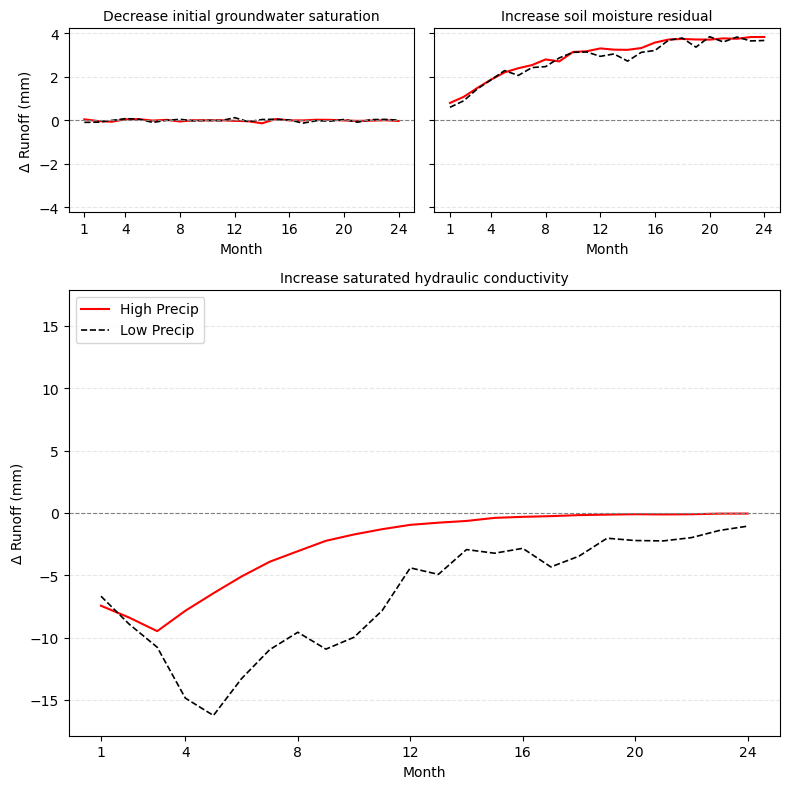

In [95]:
fig = plt.figure(figsize=(8, 8))
gs = GridSpec(3, 2, figure=fig)

def plot_pair(ax, high_y, low_y, title):
    ax.plot(x, high_y, color='red', label='High Precip', linewidth=1.5)
    ax.plot(x, low_y, color='black', linestyle='--', label='Low Precip', linewidth=1.2)
    
    ax.axhline(0, color='gray', ls='--', lw=0.8)
    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Month')
    ax.set_ylabel('Δ Runoff (mm)')
    ax.set_xticks([1, 4, 8, 12, 16, 20, 24])
    ax.grid(True, axis='y', ls='--', alpha=0.3)

    ymax = max(abs(high_y).max(), abs(low_y).max()) * 1.10
    ax.set_ylim(-ymax, ymax)

# 第一行左图
ax1 = fig.add_subplot(gs[0, 0])
plot_pair(ax1, high_y_list[0], low_y_list[0], titles[0])

# 第一行右图
ax2 = fig.add_subplot(gs[0, 1], sharex=ax1, sharey=ax1)
plot_pair(ax2, high_y_list[1], low_y_list[1], titles[1])
ax2.set_ylabel('')
ax2.tick_params(labelleft=False)

# 下方横跨两列的图
ax3 = fig.add_subplot(gs[1:, :])
plot_pair(ax3, high_y_list[2], low_y_list[2], titles[2])
ax3.legend(loc='upper left')

plt.tight_layout()
plt.show()

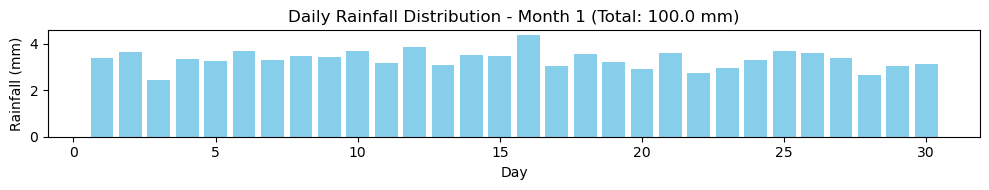

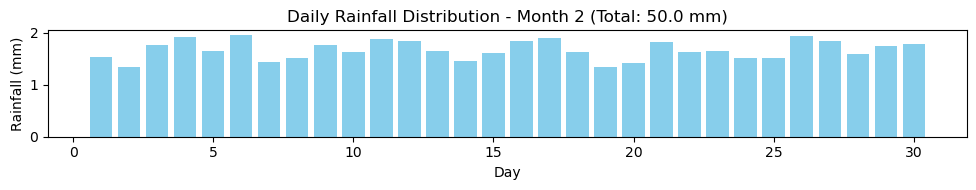

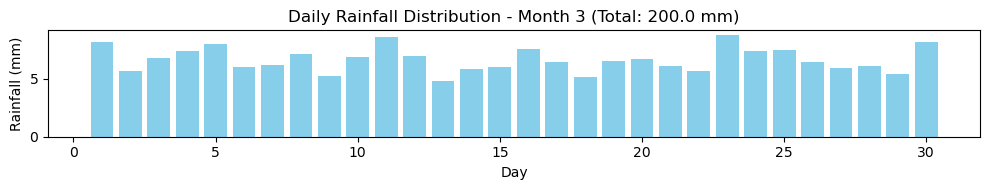

In [72]:
def distribute_monthly_rainfall(
    total_monthly_rainfall: NDArray[np.floating],
    num_days: int,
    seed: int | None = None,
) -> NDArray[np.floating]:
    
    rng = np.random.default_rng(seed)
    daily_rainfall_data = []

    shape_k = 50 
    scale_theta = 1.0 

    for rainfall in total_monthly_rainfall:
        if rainfall <= 0:
            daily_rainfall_data.append(np.zeros(num_days))
            continue

        weights = gamma.rvs(a=shape_k, scale=scale_theta, size=num_days, random_state=rng)

        weights /= np.sum(weights)

        daily_rainfall = rainfall * weights
        daily_rainfall_data.append(daily_rainfall)

    return np.array(daily_rainfall_data)

test_rainfall = np.array([100.0, 50.0, 200]) 
num_days = 30
seed = 42
result = distribute_monthly_rainfall(test_rainfall, num_days, seed)

for i, month_data in enumerate(result):
    plt.figure(figsize=(10, 2))
    plt.bar(np.arange(1, num_days + 1), month_data, color='skyblue')
    plt.title(f"Daily Rainfall Distribution - Month {i+1} (Total: {test_rainfall[i]} mm)")
    plt.xlabel("Day")
    plt.ylabel("Rainfall (mm)")
    plt.tight_layout()
    plt.show()

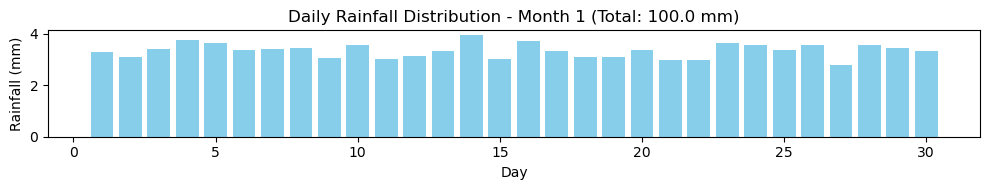

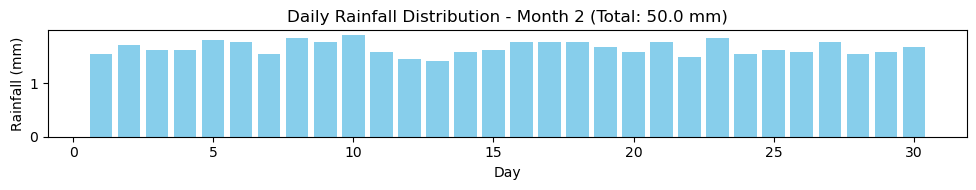

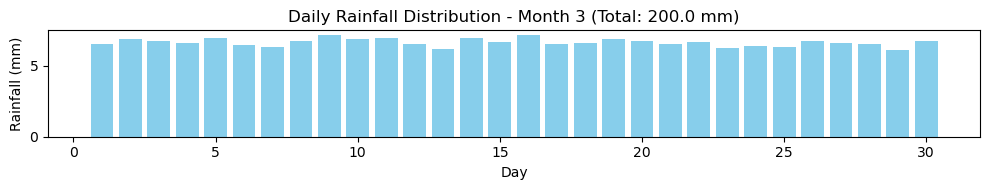

In [74]:
def distribute_monthly_rainfall(
    total_monthly_rainfall: NDArray[np.floating],
    num_days: int,
    seed: int | None = None,
) -> NDArray[np.floating]:
    rng = np.random.default_rng(seed)

    daily_rainfall_data = []
    for rainfall in total_monthly_rainfall:
        daily_rainfall = np.zeros(num_days)

        for _ in range(int(rainfall)):
            day = rng.integers(0, num_days, seed) 
            daily_rainfall[day] += 1.0  
        if np.sum(daily_rainfall > 0):
            daily_rainfall *= rainfall / np.sum(daily_rainfall)
        else:
            daily_rainfall[:] = 0
        daily_rainfall_data.append(daily_rainfall)

    return np.nan_to_num(np.array(daily_rainfall_data), nan=0.0)

test_rainfall = np.array([100.0, 50.0, 200]) 
num_days = 30
seed = 42
result = distribute_monthly_rainfall(test_rainfall, num_days, seed)

for i, month_data in enumerate(result):
    plt.figure(figsize=(10, 2))
    plt.bar(np.arange(1, num_days + 1), month_data, color='skyblue')
    plt.title(f"Daily Rainfall Distribution - Month {i+1} (Total: {test_rainfall[i]} mm)")
    plt.xlabel("Day")
    plt.ylabel("Rainfall (mm)")
    plt.tight_layout()
    plt.show()


In [34]:
np.shape(low_runoff_diff5)

(5, 24)

In [39]:
for i, title in enumerate(titles):
    high_diff = high_y_list[i]
    low_diff  = low_y_list[i]

    high_ratio = (high_diff / np.mean(high_con_monthly_surrunoff_mean, axis=0)) * 100
    low_ratio  = (low_diff  / np.mean(low_con_monthly_surrunoff_mean, axis=0)) * 100

    df = pd.DataFrame({
        'Month': x,
        'High Precip ΔRunoff Ratio': [f"{v:.2f}%" for v in high_ratio],
        'Low Precip ΔRunoff Ratio':  [f"{v:.2f}%" for v in low_ratio]
    })

    filename = f"runoff_ratio_{i+1}.xlsx"
    df.to_excel(filename, index=False)


In [18]:
np.allclose(high_con_monthly_surrunoff_mean, high_con_monthly_surrunoff_mean5)
df_diff = pd.DataFrame({
    "real": high_con_monthly_surrunoff_mean.flatten(),
    "increase": high_con_monthly_surrunoff_mean5.flatten(),
    "difference": (high_con_monthly_surrunoff_mean - high_con_monthly_surrunoff_mean5).flatten()
})
print(df_diff)

           real    increase  difference
0    139.859895  132.494386    7.365509
1    438.103964  428.152923    9.951041
2    232.730127  225.203892    7.526235
3    204.904577  199.782071    5.122506
4    124.319764  120.978134    3.341630
..          ...         ...         ...
115  270.182368  270.143924    0.038444
116  155.974495  155.857646    0.116849
117  254.997336  254.982817    0.014519
118  223.871687  223.880599   -0.008913
119  214.753456  214.707844    0.045612

[120 rows x 3 columns]


In [19]:
for key in high_experiments:
    globals()[f"i4H{key}"] = xr.load_dataset(f"{path4}/h{key}/initial_state.nc")
    globals()[f"c4H{key}"] = xr.load_dataset(f"{path4}/h{key}/all_continuous_data.nc")
    globals()[f"f4H{key}"] = xr.load_dataset(f"{path4}/h{key}/final_state.nc")

for key in low_experiments:
    globals()[f"i4L{key}"] = xr.load_dataset(f"{path4}/l{key}/initial_state.nc")
    globals()[f"c4L{key}"] = xr.load_dataset(f"{path4}/l{key}/all_continuous_data.nc")
    globals()[f"f4L{key}"] = xr.load_dataset(f"{path4}/l{key}/final_state.nc")

high_con_vars4 = [
    'c4H0821', 'c4H1107', 'c4H1710', 'c4H7784', 'c4H9924'
]
low_con_vars4 = [
    'c4L0290', 'c4L0397', 'c4L0592', 'c4L2304', 'c4L9482'
]

high_con_monthly_precip_mean4 = np.zeros((5,24))
high_con_monthly_surrunoff_mean4 = np.zeros((5,24)) #(24,81)
high_con_monthly_soilmoist_mean4 = np.zeros((5,24,14)) #(24,14,81)
for i in range(5):
    ds = globals()[high_con_vars4[i]]
    high_con_monthly_precip_mean4[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high_con_monthly_surrunoff_mean4[i, :] = ds["surface_runoff"].values.mean(axis=1)
    high_con_monthly_soilmoist_mean4[i, :, :] = ds["soil_moisture"].values.mean(axis=2)

low_con_monthly_precip_mean4 = np.zeros((5,24))
low_con_monthly_surrunoff_mean4 = np.zeros((5,24))
low_con_monthly_soilmoist_mean4 = np.zeros((5,24,14))
for i in range(5):
    ds = globals()[low_con_vars4[i]]
    low_con_monthly_precip_mean4[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low_con_monthly_surrunoff_mean4[i, :] = ds["surface_runoff"].values.mean(axis=1)
    low_con_monthly_soilmoist_mean4[i, :, :] = ds["soil_moisture"].values.mean(axis=2)
low_precip_compare4 = np.vstack([low_con_monthly_precip_mean, low_con_monthly_precip_mean4])
low_surrunoff_compare4 = np.vstack([low_con_monthly_surrunoff_mean, low_con_monthly_surrunoff_mean4])

con_monthly_precip_mean4 = np.vstack([high_con_monthly_precip_mean4, low_con_monthly_precip_mean4])
con_monthly_surrunoff_mean4 = np.vstack([high_con_monthly_surrunoff_mean4, low_con_monthly_surrunoff_mean4])
con_monthly_soilmoist_mean4 = np.vstack([high_con_monthly_soilmoist_mean4, low_con_monthly_soilmoist_mean4])

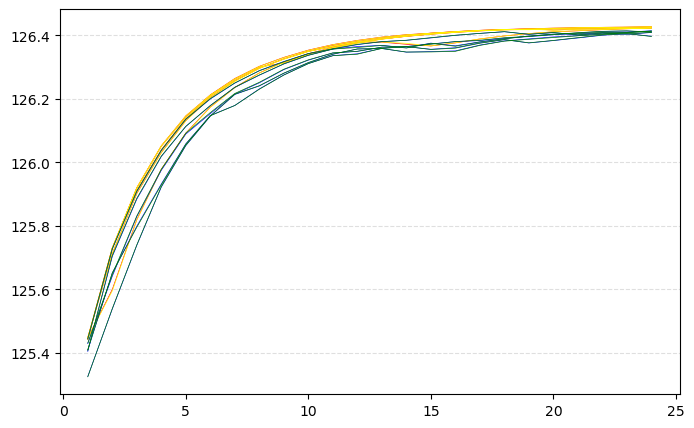

In [20]:
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(1, 25)

for var_name in high_con_vars:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    ax.plot(x, top_soil_moist, c='r', linestyle='-', label='high precip', linewidth=0.5)
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
for var_name in high_con_vars2:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    ax.plot(x, top_soil_moist, c='yellow', linestyle='-', label='high precip', linewidth=0.5)
for var_name in low_con_vars:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    ax.plot(x, top_soil_moist, c='b', linestyle='-', label='low precip', linewidth=0.5)
for var_name in low_con_vars2:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    ax.plot(x, top_soil_moist, label=f'{var} top', color='green', linestyle='-', linewidth=0.5)

# handles, labels = ax.get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys())

# fig.tight_layout()
plt.show()

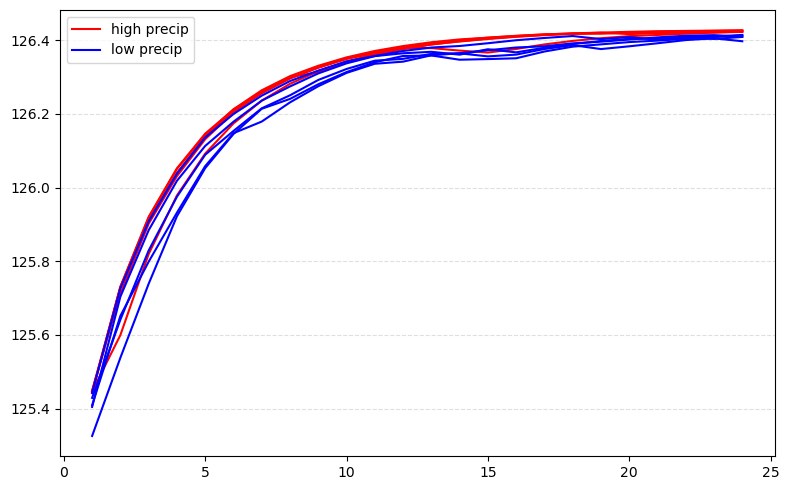

In [21]:
fig, ax = plt.subplots(figsize=(8, 5))
x = np.arange(1, 25)

for var_name in high_con_vars:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    # sub_soil_moist = soil_moist[:, 13]
    ax.plot(x, top_soil_moist, c='r', linestyle='-', label='high precip')
    # ax.plot(x, sub_soil_moist, label=f'{var} sub', color='blue', linestyle='--')
    ax.grid(True, axis='y', linestyle='--', alpha=0.4)
for var_name in low_con_vars:
    var = eval(var_name)
    soil_moist = var['soil_moisture'].values.mean(axis=2)
    top_soil_moist = soil_moist[:, 12]
    ax.plot(x, top_soil_moist, c='b', linestyle='-', label='low precip')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()
plt.show()

In [58]:
for key in high_experiments:
    globals()[f"c0H{key}"] = xr.load_dataset(f"{path_1}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c0L{key}"] = xr.load_dataset(f"{path_1}/l{key}/all_continuous_data.nc")

for key in high_experiments:
    globals()[f"c02H{key}"] = xr.load_dataset(f"{path_2}/h{key}/all_continuous_data.nc")

for key in low_experiments:
    globals()[f"c02L{key}"] = xr.load_dataset(f"{path_2}/l{key}/all_continuous_data.nc")

high0_con_vars = [
    'c0H0821', 'c0H1107', 'c0H1710', 'c0H7784', 'c0H9924'
]
low0_con_vars = [
    'c0L0290', 'c0L0397', 'c0L0592', 'c0L2304', 'c0L9482'
]

high0_con_vars2 = [
    'c02H0821', 'c02H1107', 'c02H1710', 'c02H7784', 'c02H9924'
]
low0_con_vars2 = [
    'c02L0290', 'c02L0397', 'c02L0592', 'c02L2304', 'c02L9482'
]


In [79]:
high0_con_monthly_precip_mean = np.zeros((5,24))
high0_con_monthly_surrunoff_mean = np.zeros((5,24)) #(24,81)
for i in range(5):
    ds = globals()[high0_con_vars[i]]
    high0_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high0_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
# high0_precip_compare = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean])
# high0_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean, high0_con_monthly_surrunoff_mean])

low0_con_monthly_precip_mean = np.zeros((5,24))
low0_con_monthly_surrunoff_mean = np.zeros((5,24))
for i in range(5):
    ds = globals()[low0_con_vars[i]]
    low0_con_monthly_precip_mean[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low0_con_monthly_surrunoff_mean[i, :] = ds["surface_runoff"].values.mean(axis=1)
# low0_precip_compare = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean])
# low0_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean])

high0_con_monthly_precip_mean2 = np.zeros((5,24))
high0_con_monthly_surrunoff_mean2 = np.zeros((5,24)) #(24,81)
for i in range(5):
    ds = globals()[high0_con_vars2[i]]
    high0_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    high0_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
# high0_precip_compare2 = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean2])
# high0_surrunoff_compare2 = np.vstack([high_con_monthly_surrunoff_mean, high0_con_monthly_surrunoff_mean2])
high0_precip_compare = np.vstack([high_con_monthly_precip_mean, high0_con_monthly_precip_mean, high0_con_monthly_precip_mean2])
high0_surrunoff_compare = np.vstack([high_con_monthly_surrunoff_mean,high0_con_monthly_surrunoff_mean2, high0_con_monthly_surrunoff_mean])

low0_con_monthly_precip_mean2 = np.zeros((5,24))
low0_con_monthly_surrunoff_mean2 = np.zeros((5,24))
for i in range(5):
    ds = globals()[low0_con_vars2[i]]
    low0_con_monthly_precip_mean2[i, :] = ds["precipitation_surface"].values.mean(axis=1)
    low0_con_monthly_surrunoff_mean2[i, :] = ds["surface_runoff"].values.mean(axis=1)
# low0_precip_compare2 = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean2])
# low0_surrunoff_compare2 = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean2])
low0_precip_compare = np.vstack([low_con_monthly_precip_mean, low0_con_monthly_precip_mean, low0_con_monthly_precip_mean2])
low0_surrunoff_compare = np.vstack([low_con_monthly_surrunoff_mean, low0_con_monthly_surrunoff_mean2, low0_con_monthly_surrunoff_mean])

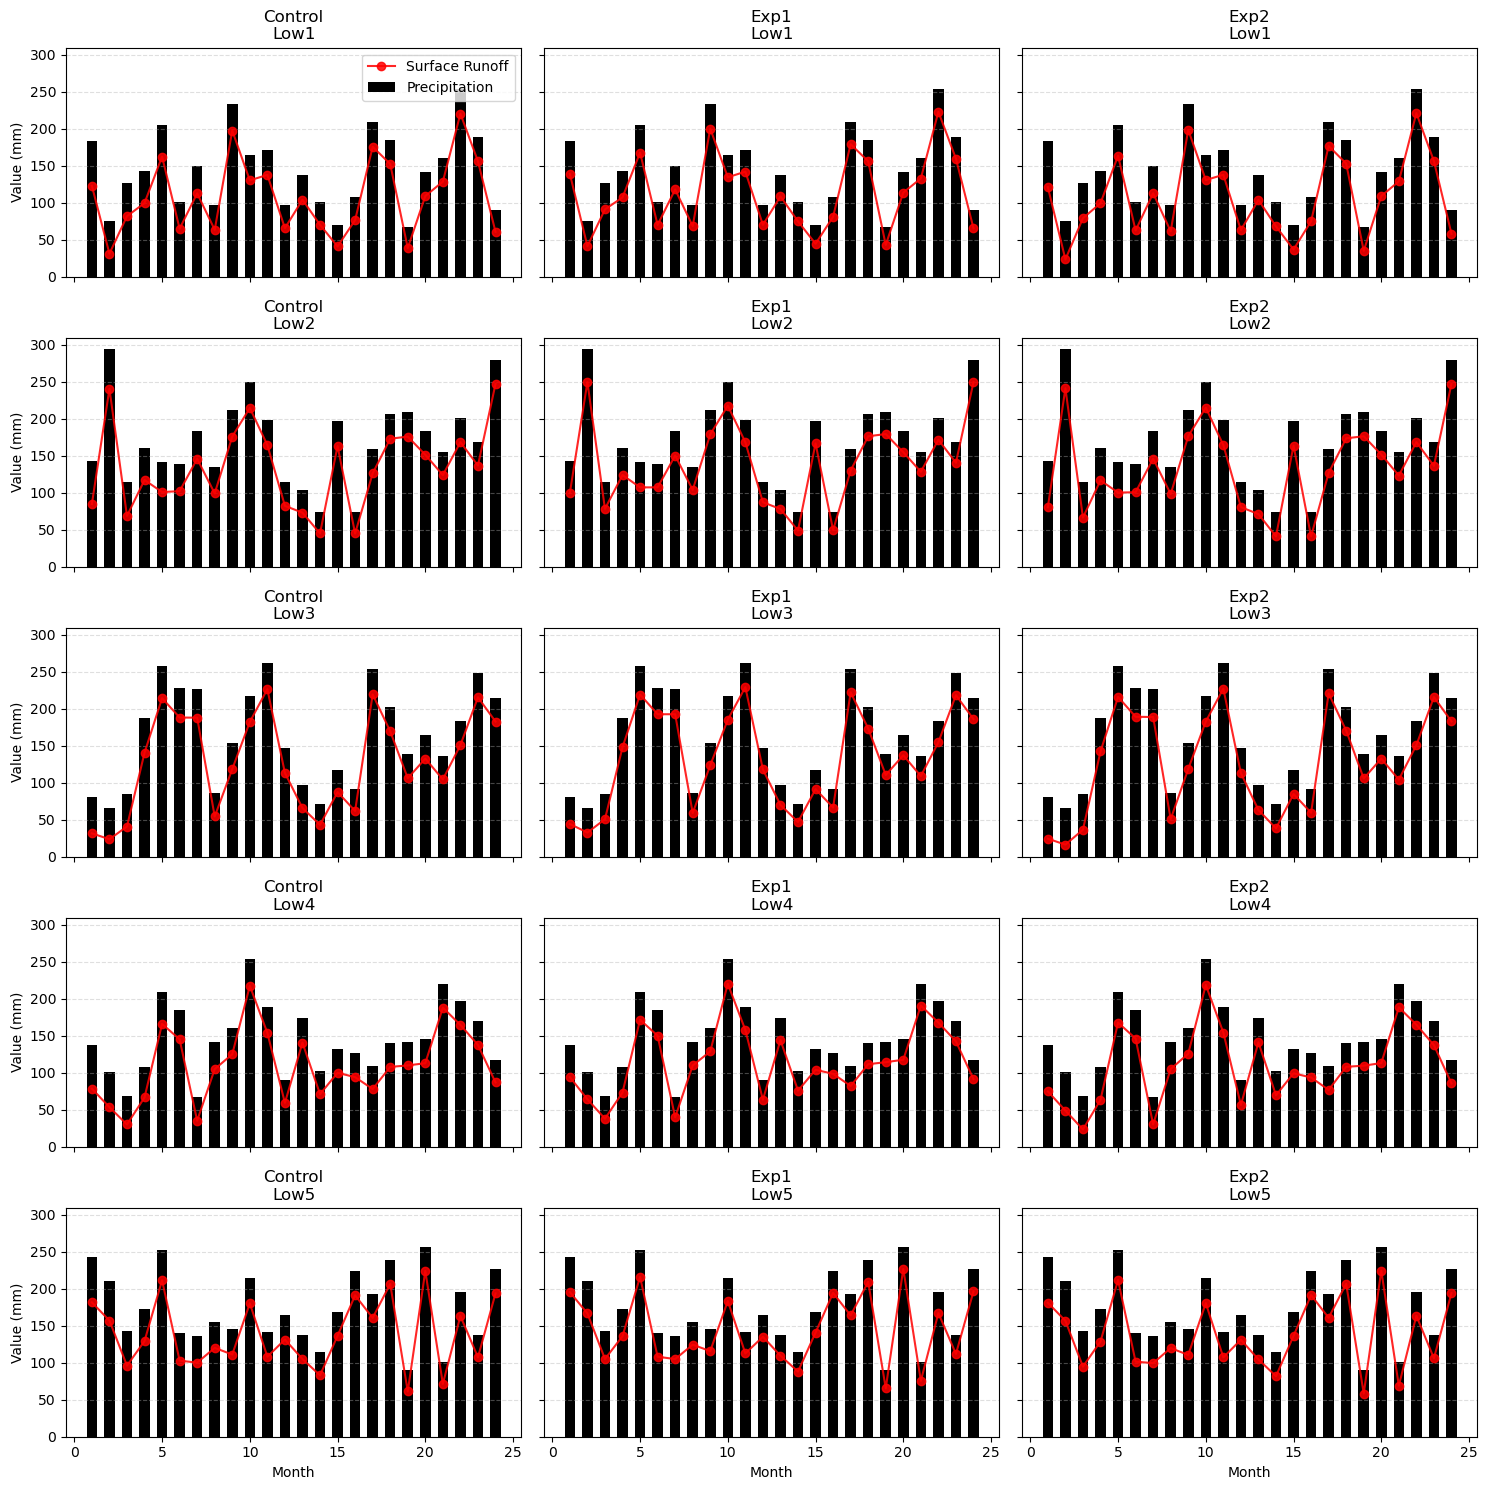

In [64]:
fig, axes = plt.subplots(5, 3, figsize=(15, 15), sharex=True, sharey=True)
x = np.arange(1, 25)

max_precip = np.max(low0_precip_compare)
max_runoff = np.max(low0_surrunoff_compare)
max_y = max(max_precip, max_runoff)

for row in range(5):       # 5 rows = Low1 to Low5
    for col in range(3):   # 3 columns = control, experiment1, experiment2
        i = row + col * 5
        ax = axes[row, col]

        precip = low0_precip_compare[i, :]
        runoff = low0_surrunoff_compare[i, :]

        ax.bar(x, precip, color='black', width=0.6, label='Precipitation')
        ax.plot(x, runoff, color='red', marker='o', label='Surface Runoff', alpha=0.85)

        if row == 0 and col == 0:
            ax.legend(loc='upper right')

        # 设置标题
        if row < 5:
            title = f'Low{row+1}'
            if col == 0:
                title = f'Control\n{title}'
            elif col == 1:
                title = f'Exp1\n{title}'
            elif col == 2:
                title = f'Exp2\n{title}'
            ax.set_title(title)

        if row == 4:
            ax.set_xlabel('Month')
        if col == 0:
            ax.set_ylabel('Value (mm)')

        ax.set_ylim(0, max_y * 1.05)
        ax.grid(True, axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

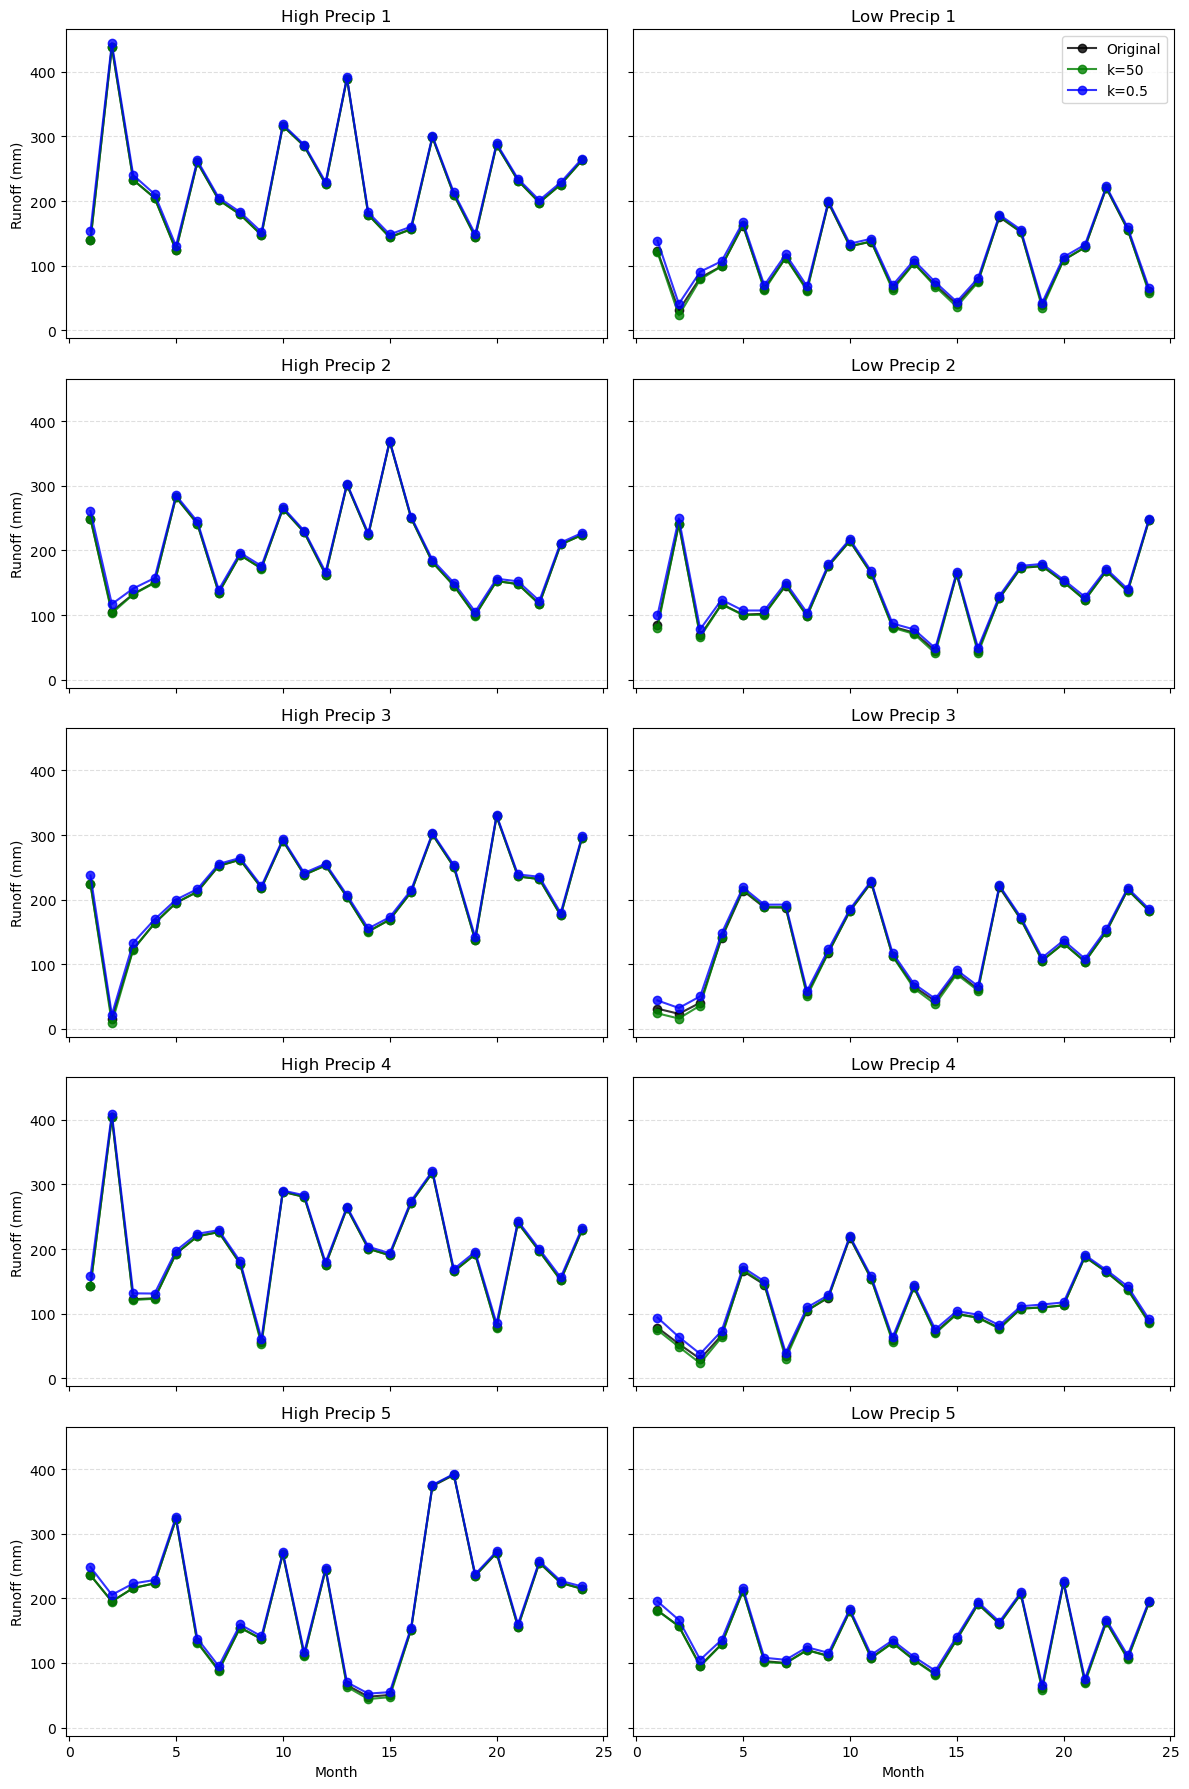

In [82]:
x = np.arange(1, 25)

labels = ['Original', 'k=50', 'k=0.5']
colors = ['black', 'green', 'blue']

fig, axes = plt.subplots(5, 2, figsize=(12, 18), sharex=True, sharey=True)

for i in range(5):  # Low1~Low5
    for j in range(3):  # 3 types of precipitation setting
        # High precip (左列)
        runoff_high = high0_surrunoff_compare[i + j * 5, :]
        axes[i, 0].plot(x, runoff_high, label=labels[j], color=colors[j], marker='o', alpha=0.8)

        # Low precip (右列)
        runoff_low = low0_surrunoff_compare[i + j * 5, :]
        axes[i, 1].plot(x, runoff_low, label=labels[j], color=colors[j], marker='o', alpha=0.8)

    axes[i, 0].set_title(f'High Precip {i+1}')
    axes[i, 1].set_title(f'Low Precip {i+1}')

    axes[i, 0].set_ylabel('Runoff (mm)')
    axes[i, 0].grid(True, axis='y', linestyle='--', alpha=0.4)
    axes[i, 1].grid(True, axis='y', linestyle='--', alpha=0.4)

    if i == 4:
        axes[i, 0].set_xlabel('Month')
        axes[i, 1].set_xlabel('Month')

    if i == 0:
        axes[i, 1].legend(loc='upper right')  # 只显示一次 legend

plt.tight_layout()
plt.show()

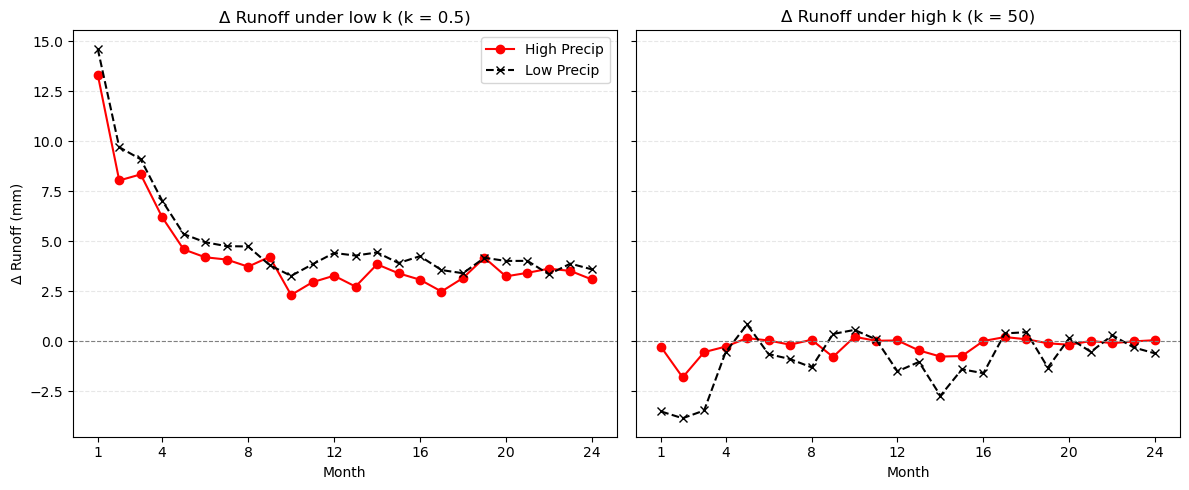

In [88]:
delta_high_lowk = np.mean(high0_con_monthly_surrunoff_mean - high_con_monthly_surrunoff_mean, axis=0)
delta_low_lowk  = np.mean(low0_con_monthly_surrunoff_mean  - low_con_monthly_surrunoff_mean, axis=0)

delta_high_highk = np.mean(high0_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean, axis=0)
delta_low_highk  = np.mean(low0_con_monthly_surrunoff_mean2  - low_con_monthly_surrunoff_mean, axis=0)

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
xticks = [1] + list(np.arange(4, 24, 4)) + [24]

# ---- 左图：low k ----
ax = axes[0]
ax.plot(x, delta_high_lowk, label='High Precip', color='r', marker='o')
ax.plot(x, delta_low_lowk,  label='Low Precip',  color='k', linestyle='--', marker='x')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff under low k (k = 0.5)')
ax.set_xlabel('Month')
ax.set_ylabel('Δ Runoff (mm)')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()

# ---- 右图：high k ----
ax = axes[1]
ax.plot(x, delta_high_highk, label='High Precip', color='r', marker='o')
ax.plot(x, delta_low_highk,  label='Low Precip',  color='k', linestyle='--', marker='x')
ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff under high k (k = 50)')
ax.set_xlabel('Month')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

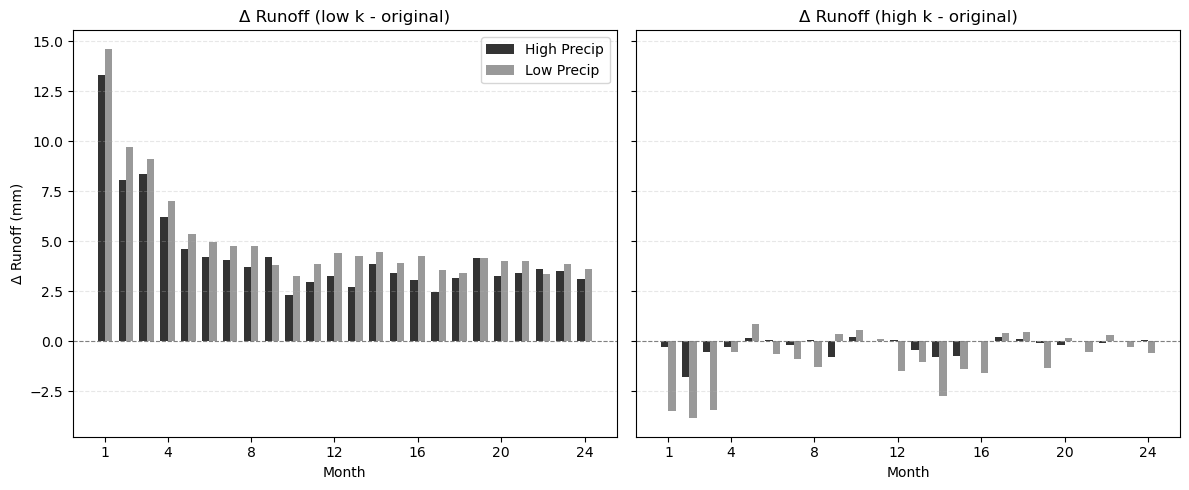

In [91]:
bar_width = 0.35

# Δ runoff for low k
delta_high_lowk = np.mean(high0_con_monthly_surrunoff_mean - high_con_monthly_surrunoff_mean, axis=0)
delta_low_lowk  = np.mean(low0_con_monthly_surrunoff_mean  - low_con_monthly_surrunoff_mean, axis=0)

# Δ runoff for high k
delta_high_highk = np.mean(high0_con_monthly_surrunoff_mean2 - high_con_monthly_surrunoff_mean, axis=0)
delta_low_highk  = np.mean(low0_con_monthly_surrunoff_mean2  - low_con_monthly_surrunoff_mean, axis=0)

# 创建双子图
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# ====== 左图：low k ======
ax = axes[0]
x_high = x - bar_width / 2
x_low  = x + bar_width / 2

ax.bar(x_high, delta_high_lowk, width=bar_width, color='black', alpha=0.8, label='High Precip')
ax.bar(x_low,  delta_low_lowk,  width=bar_width, color='gray',  alpha=0.8, label='Low Precip')

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff (low k - original)')
ax.set_xlabel('Month')
ax.set_ylabel('Δ Runoff (mm)')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)
ax.legend()

# ====== 右图：high k ======
ax = axes[1]
x_high = x - bar_width / 2
x_low  = x + bar_width / 2

ax.bar(x_high, delta_high_highk, width=bar_width, color='black', alpha=0.8, label='High Precip')
ax.bar(x_low,  delta_low_highk,  width=bar_width, color='gray',  alpha=0.8, label='Low Precip')

ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
ax.set_title('Δ Runoff (high k - original)')
ax.set_xlabel('Month')
ax.set_xticks(xticks)
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()